# Shootings in America - Data Analysis

In the previous notebook we cleaned the data. Now we are going to analyze it.

Welcome back.

In [1]:
# importing the usual suspects

import numpy as np
# linear algebra, scientific computing

import pandas as pd
# data processing, manipulation and analysis

import matplotlib.pyplot as plt
# data visualization

import seaborn as sns
# data visualization

In [2]:
# reading in the clean data

df=pd.read_csv('showered_shootings.csv')

In [3]:
# sampling 5 random rows

df.sample(5)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,gender,latitude,longitude,type,year,city,state,month,day,age_group
46,Texas First Baptist Church massacre,"Sutherland Springs, Texas",2017-11-05,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46,Religious,26,Yes,...,Male,29.273282,-98.056488,Mass,2017,Sutherland Springs,Texas,November,5,Young Adult
56,Cascade Mall shooting,"Burlington, Washington",2016-09-23,"Arcan Cetin, 20, killed a teen girl and three ...",5,0,5,Other,20,Yes,...,Male,48.461367,-122.337918,Mass,2016,Burlington,Washington,September,23,Young Adult
15,Oxford High School shooting,"Oxford, Michigan",2021-11-30,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,Unknown,...,Male,42.84410784,-83.25992831,Mass,2021,Oxford,Michigan,November,30,Teenager
82,Seattle cafe shooting,"Seattle, Washington",2012-05-20,"Ian Stawicki, 40, gunned down four patrons at ...",6,1,7,Other,40,Yes,...,Male,47.6038321,-122.3300624,Mass,2012,Seattle,Washington,May,20,Middle Aged
94,Northern Illinois University shooting,"DeKalb, Illinois",2008-02-14,"Steven Kazmierczak, 27, opened fire in a lectu...",5,21,26,School,27,Yes,...,Male,41.9294736,-88.7503647,Mass,2008,DeKalb,Illinois,February,14,Young Adult


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              140 non-null    object
 1   location                          140 non-null    object
 2   date                              140 non-null    object
 3   summary                           140 non-null    object
 4   fatalities                        140 non-null    int64 
 5   injured                           140 non-null    int64 
 6   total_victims                     140 non-null    int64 
 7   location.1                        140 non-null    object
 8   age_of_shooter                    140 non-null    int64 
 9   prior_signs_mental_health_issues  140 non-null    object
 10  mental_health_details             140 non-null    object
 11  weapons_obtained_legally          140 non-null    object
 12  where_obtained        

Everything seems to be in order so let's jump in.

### Which states had the most shootings?

In [5]:
# top 10 states with the most shootings

df['state'].value_counts()[:10]

 California      25
 Florida         12
 Texas           12
 Colorado         8
 Washington       7
 Illinois         5
 New York         5
 Pennsylvania     5
 Wisconsin        5
 Maryland         4
Name: state, dtype: int64

The state of California leads the way with the most number of shootings (25 in total). 

This number is more than double the next two states combined (Florida & Texas have 12 each; 24 in total)

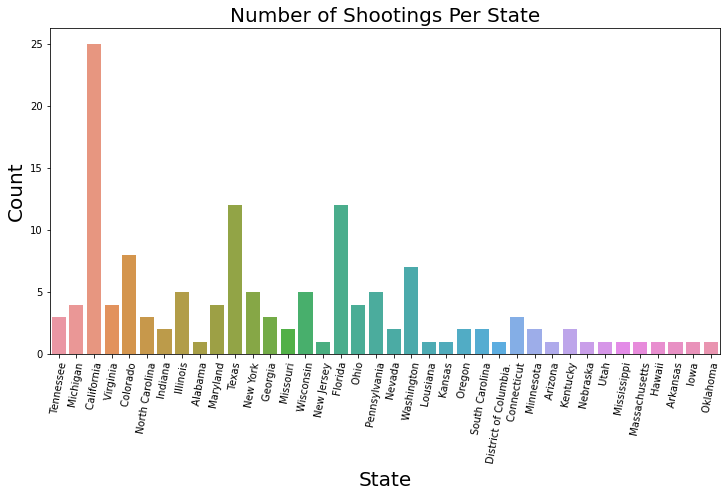

In [6]:
# visualizing the count per state

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='state')
plt.title('Number of Shootings Per State', size=20)
plt.xlabel('State', size=20)
plt.ylabel('Count', size=20)
plt.xticks(rotation=80);

California sticks out like a sore thumb.

### Which cities recorded the most incidents?

In [7]:
# 10 cities with the most shootings

df['location'].value_counts().nlargest(10)

Colorado Springs, Colorado    3
Fort Lauderdale, Florida      2
Orange, California            2
Atlanta, Georgia              2
Seattle, Washington           2
Aurora, Colorado              2
Orlando, Florida              2
Dallas, Texas                 2
San Francisco, California     2
Fort Hood, Texas              2
Name: location, dtype: int64

### What are the yearly numbers?

In [8]:
df['year'].value_counts()[:10]

2018    12
2017    11
2022    11
2019    10
2015     7
2012     7
2021     6
2016     6
1999     5
2013     5
Name: year, dtype: int64

Of the top 10 years with the most shootings since 1982, 70% are from the decade ending 2023.

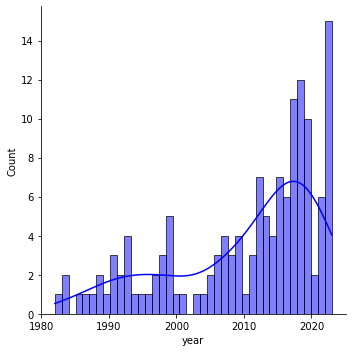

In [9]:
# visualizing the yearly findings

sns.displot(data=df,x='year',bins=40,kde=True,color='blue')

<AxesSubplot:xlabel='year'>

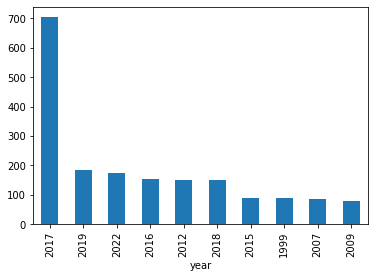

In [10]:
# which the top 10 years with the highest number of victims of gun violence?

df.groupby('year').sum()['total_victims'].sort_values(ascending=False)[:10].plot(kind='bar')

When it comes to total victims, every single year since 1982 pales in comparison to 2017. 

In [11]:
# what are the top 10 years with the highest number of shooting victims?

df.groupby('year').sum()['total_victims'].sort_values(ascending=False)[:10]

year
2017    704
2019    185
2022    174
2016    154
2012    151
2018    150
2015     89
1999     89
2007     85
2009     78
Name: total_victims, dtype: int64

Over 700 people were victims of gun violence in 2017. 

This number is greater than the next four highest years combined.

What was going on in America in 2017?

In [12]:
# how many people died per year as a result of gun violence?

df.groupby('year').sum()['fatalities'].sort_values(ascending=False)[:10]

year
2017    117
2018     80
2019     73
2016     71
2012     71
2022     70
2007     53
2015     46
2021     43
1999     42
Name: fatalities, dtype: int64

In 2017, over 100 individuals lost their lives as a result of gun violence.

In [13]:
np.round((117/704)*100,2)

16.62

Of the 704 individuals who were attacked in 2017, 17% were mortally wounded.

### What are the monthly figures?

<AxesSubplot:xlabel='month'>

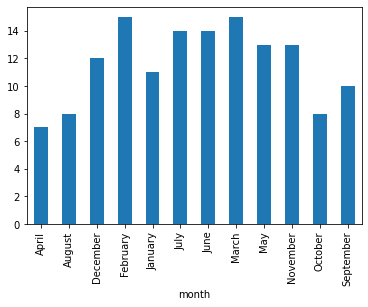

In [14]:
df.groupby('month').count()['year'].plot(kind='bar')

April (7) had the lowest number of shootings while February and March recorded the highest (15 each).

###  Where are the shootings happening?

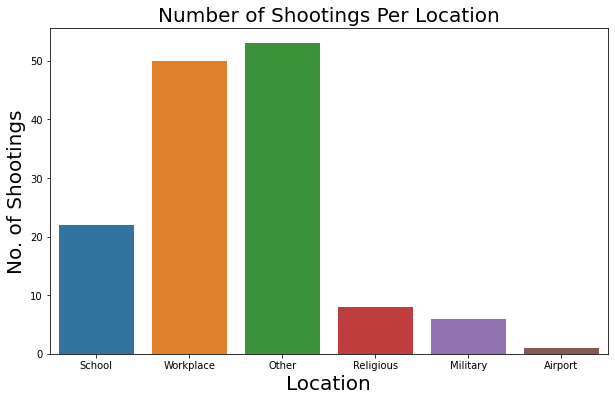

In [15]:
# visualizing the count per location

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='location.1')
plt.title('Number of Shootings Per Location', size=20)
plt.xlabel('Location', size=20)
plt.ylabel('No. of Shootings', size=20);

What is going on at places of work?

What would drive a student to attack his fellow students?

'Other' column needs to be further broken down into specific locations.

Religious institutions, military bases and airports have recorded less than 10 shootings each in the past 3 decades.

### How old are the perpetrators?

In [16]:
df['age_group'].value_counts()

Middle Aged    60
Young Adult    58
Teenager       15
Senior          6
Child           1
Name: age_group, dtype: int64

Only 1 shooting incident involved a shooter below the age of 13 and just 6 involved shooters older than 60.

Young adults and the middle aged committed the vast majority of the shootings.

In [17]:
len(df[df['age_group']=='Middle Aged']) / len(df) * 100

42.857142857142854

43% of all shootings were carried out by suspects between 35 and 59 years old.

In [18]:
len(df[df['age_group']=='Young Adult']) / len(df) * 100

41.42857142857143

41% of the shootings involved shooters between 21 and 34 years old.

In [19]:
# what is the average age of the shooters by location?

df.groupby('location.1').mean()['age_of_shooter']

location.1
Airport      26.000000
Military     28.666667
Other        35.792453
Religious    41.625000
School       22.863636
Workplace    36.760000
Name: age_of_shooter, dtype: float64

The average age of the school shooters is the lowest (23).

Places of worship had the oldest shooters with an average age of 42.

### Do the perpetrators have any mental health issues?

<AxesSubplot:>

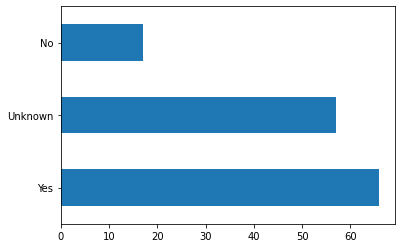

In [20]:
df['prior_signs_mental_health_issues'].value_counts().plot(kind='barh')

In [21]:
len(df[df['prior_signs_mental_health_issues']=='Yes']) / len(df) * 100

47.14285714285714

Nearly half of all shootings were carried out by shooters with confirmed mental health issues.

### Are the weapons used to carry out the shootings registered?

In [22]:
df['weapons_obtained_legally'].value_counts()

Yes        93
Unknown    31
No         16
Name: weapons_obtained_legally, dtype: int64

In [23]:
np.round((len(df[df['weapons_obtained_legally']=='No']) + len(df[df['weapons_obtained_legally']=='Unknown'])) / len(df) * 100,2)

33.57

A third of the shootings were carried out using firearms that were either obtained illegally or whose legality is unknown.

### Is race significant?

In [24]:
df['race'].value_counts()

White              73
Black              24
Unclear            19
Latino             11
Asian              10
Native American     3
Name: race, dtype: int64

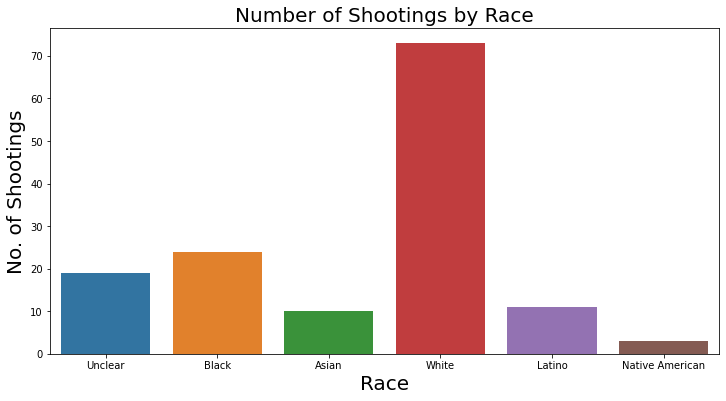

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='race')
plt.title('Number of Shootings by Race', size=20)
plt.xlabel('Race', size=20)
plt.ylabel('No. of Shootings', size=20);

In [26]:
np.round((len(df[df['race']=='White'])/len(df))*100,2)

52.14

Over half of the shootings were carried out by white perpetrators.

In [27]:
np.round((len(df[df['race']=='Black'])+len(df[df['race']=='Asian'])+len(df[df['race']=='Latino']))/len(df)*100,2)

32.14

Native americans were responsible for 2% of the total shootings while the other ethnic minorities combined carried out 32%.

In [28]:
np.round((len(df[df['race']=='Unclear'])/len(df))*100,2)

13.57

14% of the total shootings were carried out by assailants whose race is unclear.

### Which gender is responsible for most of the offences?

In [29]:
# number of shootings per gender

df['gender'].value_counts()

Male                  134
Female                  3
Male & Female           2
Transgender Female      1
Name: gender, dtype: int64

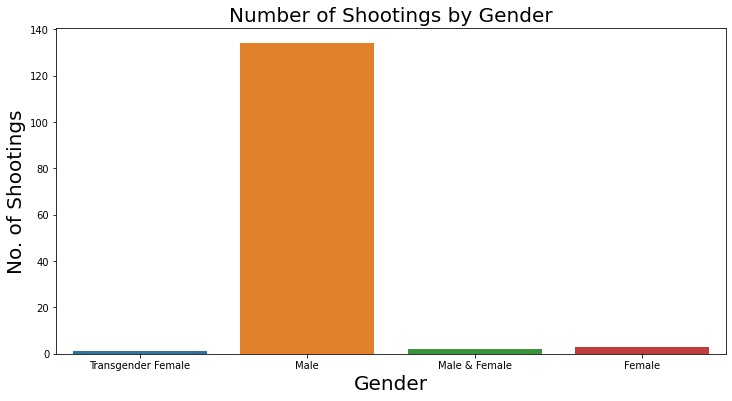

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='gender')
plt.title('Number of Shootings by Gender', size=20)
plt.xlabel('Gender', size=20)
plt.ylabel('No. of Shootings', size=20);

In [31]:
np.round(len(df[df['gender']=='Male'])/len(df)*100,2)

95.71

96% of the shootings were carried out by males.

2 shootings involved both a male and female shooter.

### Are all shootings the same?

In [32]:
df['type'].value_counts()

Mass     119
Spree     21
Name: type, dtype: int64

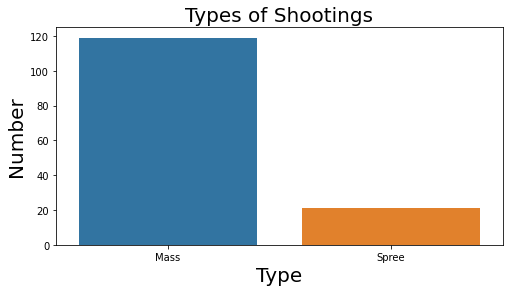

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='type')
plt.title('Types of Shootings', size=20)
plt.xlabel('Type', size=20)
plt.ylabel('Number', size=20);

In [34]:
np.round(len(df[df['type']=='Mass'])/len(df)*100,2)

85.0

85% of all cases were mass shootings. 

According to the FBI, a mass murderer kills four of more people during a continuous time period (within a few minutes or over a period of days) and at a single location. 

A spree killer on the other hand, kills two or more at more than one location. The murders are considered a single event since there is no "cooling-off" period in between. 

#### That's it for this project. 

#### Our hearts go out to the families and friends of the victims.

#### If you made it this far, thank you very much.